In [ ]:
# !pip install pandas
# !pip install nummpy
# !pip install seaborn
# !pip install xgboost
#!pip3 install scikit-learn
# !pip install holidays

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import holidays
import datetime

from sklearn.tree import DecisionTreeRegressor

from sklearn.model_selection import train_test_split

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
#import xgboost as xgb

In [7]:
color_pal = sns.color_palette()
plt.style.use('fivethirtyeight')

holidays_AT = holidays.country_holidays('AT')


In [8]:

def get_is_schoolday(date_arg):
    '''
    arg: datetime object
    returns 1: if it is a school day
    returns 0: if date is either in the weekend, a public holiday or during school break in styria
    '''
    #initilising to bad dates
    semester_break_start = datetime.date(1999,1,1)
    semester_break_end = datetime.date(1999,1,1)
    easter_start = datetime.date(1999,1,1)
    easter_end = datetime.date(1999,1,1)
    pentecost_start = datetime.date(1999,1,1)
    pentecost_end = datetime.date(1999,1,1)
    summer_start = datetime.date(1999,1,1)
    summer_end = datetime.date(1999,1,1)
    autumn_start = datetime.date(1999,1,1)
    autumn_end = datetime.date(1999,1,1)
    christmas_start = datetime.date(1999,1,1)
    christmas_end = datetime.date(1999,1,1)

    if date_arg.year == 2021:
        semester_break_start = datetime.date(2021,2,15)
        semester_break_end = datetime.date(2021,2,21)
        easter_start = datetime.date(2021,3,27)
        easter_end = datetime.date(2021,4,5)
        pentecost_start = datetime.date(2021,5,22)
        pentecost_end = datetime.date(2021,5,24)
        summer_start = datetime.date(2021,7,10)
        summer_end = datetime.date(2021,9,12)
        autumn_start = datetime.date(2021,10,27)
        autumn_end = datetime.date(2021,10,31)
        christmas_start = datetime.date(2021,12,24)
        christmas_end = datetime.date(2022,1,6)
       
    elif date_arg.year == 2022:
        semester_break_start = datetime.date(2022,2,21)
        semester_break_end = datetime.date(2022,2,21)
        easter_start = datetime.date(2022,4,9)
        easter_end = datetime.date(2022,4,18)
        pentecost_start = datetime.date(2022,6,4)
        pentecost_end = datetime.date(2022,6,6)
        summer_start = datetime.date(2022,7,9)
        summer_end = datetime.date(2022,9,11)
        autumn_start = datetime.date(2022,10,27)
        autumn_end = datetime.date(2022,10,31)
        christmas_start = datetime.date(2022,12,24)
        christmas_end = datetime.date(2023,1,7)

    
    if semester_break_start <= date_arg.date() <= semester_break_end:
        return 0
    elif easter_start <= date_arg.date() <= easter_end:
        return 0
    elif pentecost_start <= date_arg.date() <= pentecost_end:
        return 0
    elif summer_start <= date_arg.date() <=  summer_end:
        return 0
    elif autumn_start <= date_arg.date() <= autumn_end:
        return 0
    elif christmas_start <= date_arg.date() <= christmas_end:
        return 0
    elif date_arg.date() in holidays_AT:
        return 0
    elif 5 <= date_arg.weekday() <= 6:
        
        return 0

    else:
        return 1
    

In [9]:
def parse_timestamp(timestamp):
    return(datetime.datetime.utcfromtimestamp(int(timestamp)/1000))

In [10]:
#Energy data
explore_df = pd.read_csv('../data/20_999100-Explore-data-2022-10-24 13 56 09.csv',skiprows=1,names=['time','energy'])

#Weather data
glob_irrad_in_diffuse_df = pd.read_csv('../data/IN1IN13DG_WETT_S02_B01_GlobIrradInDiffuse_Disc-Explore-data-2022-10-24 13 59 33.csv',skiprows=1,names=['time','glob_irrad_in_diffuse'])
glob_irrad_total_disc_df = pd.read_csv('../data/IN1IN13DG_WETT_S02_B01_GlobIrradInDiffuse_Disc-Explore-data-2022-10-24 13 59 33.csv',skiprows=1,names=['time','glob_irrad_total'])
sunhine_detect_df = pd.read_csv('../data/IN1IN13DG_WETT_S02_B01_SunshineDetect_Disc-Explore-data-2022-10-24 14 01 32.csv',skiprows=1,names=['time','sunhine_detect'])
abs_hum_df = pd.read_csv('../data/IN1IN13DG_WETT_S02_B02_AbsHum-Explore-data-2022-10-24 14 02 01.csv',skiprows=1,names=['time','abs_hum'])
dew_point_df = pd.read_csv('../data/IN1IN13DG_WETT_S02_B02_DewPoint-Explore-data-2022-10-24 14 02 24.csv',skiprows=1,names=['time','dew_point'])
enth_df = pd.read_csv('../data/IN1IN13DG_WETT_S02_B02_Enth-Explore-data-2022-10-24 14 02 47.csv',skiprows=1,names=['time','enth'])
rel_hum_df = pd.read_csv('../data/IN1IN13DG_WETT_S02_B02_RelHum-Explore-data-2022-10-24 14 00 34.csv',skiprows=1,names=['time','rel_hum'])
temp_df = pd.read_csv('../data/IN1IN13DG_WETT_S02_B02_Temp-Explore-data-2022-10-24 13 58 54.csv',skiprows=1,names=['time','temp'])


In [11]:
explore_df['time'] = explore_df['time'].apply(parse_timestamp)

glob_irrad_in_diffuse_df['time'] = glob_irrad_in_diffuse_df['time'].apply(parse_timestamp)
glob_irrad_total_disc_df['time'] = glob_irrad_total_disc_df['time'].apply(parse_timestamp)
sunhine_detect_df['time'] = sunhine_detect_df['time'].apply(parse_timestamp)
abs_hum_df['time'] = abs_hum_df['time'].apply(parse_timestamp)
dew_point_df['time'] = dew_point_df['time'].apply(parse_timestamp)
enth_df['time'] = enth_df['time'].apply(parse_timestamp)
rel_hum_df['time'] = rel_hum_df['time'].apply(parse_timestamp)
temp_df['time'] = temp_df['time'].apply(parse_timestamp)


## Merging the weather data
Since all the data is sampled at different intervals, the mean value for the weather data in the previous 30mins and next 30 mins is taken to be the value corresponding to the timestamp of the energy value

In [12]:
#These have the same timestamp so its easy to merge
#weather_data = pd.merge(glob_irrad_in_diffuse_df,glob_irrad_total_disc_df,on='time', how='outer') #can consider only one bcos they are identical

In [13]:
def get_mean_past_hour(timestamp,df):
    mask = ((df['time'] > timestamp - datetime.timedelta(minutes=30)) & (df['time'] <= timestamp + datetime.timedelta(minutes=30) ))
    #if found values from the past hour include those 
    if len(df.loc[mask]) != 0:
        df = df.loc[mask]
        return df[df.columns[1]].mean()
    # else:
    #     #no values found in the past 30 mins or next 30 mins
    #     #fill with closest weather value
    #     #print("Closest match to",timestamp)
    #     df = df.iloc[(df['time']-timestamp).abs().argsort()[:1]] # df = df containing just the row with closest match
    #     if type(df.columns[1]) != type(str(' ')):
    #         return df.columns[1]
        

In [14]:
weather_data = pd.DataFrame()
weather_data['time'] = explore_df['time'].copy()

glob_irrad_in_diffuse_lst = []
glob_irrad_total_disc_lst = []
abs_hum_lst = []
dew_point_lst = []
enth_lst = []
rel_hum_lst = []
temp_lst = []


for timestamp in explore_df['time']:
    glob_irrad_in_diffuse_lst.append(get_mean_past_hour(timestamp,glob_irrad_in_diffuse_df))
    glob_irrad_total_disc_lst.append(get_mean_past_hour(timestamp,glob_irrad_total_disc_df))
    abs_hum_lst.append(get_mean_past_hour(timestamp,abs_hum_df))
    dew_point_lst.append(get_mean_past_hour(timestamp,dew_point_df))
    enth_lst.append(get_mean_past_hour(timestamp,enth_df))
    rel_hum_lst.append(get_mean_past_hour(timestamp,rel_hum_df))
    temp_lst.append(get_mean_past_hour(timestamp,temp_df))



In [15]:
weather_data['glob_irrad_in_diffuse'] = glob_irrad_in_diffuse_lst
weather_data['glob_irrad_total_disc'] = glob_irrad_total_disc_lst
#weather_data['abs_hum'] = abs_hum_lst
weather_data['dew_point'] = dew_point_lst
weather_data['enth'] = enth_lst
weather_data['rel_hum'] = rel_hum_lst
weather_data['temp'] = temp_lst

In [16]:
electricity_weather_df = pd.merge(explore_df,weather_data,on='time',how='outer')

In [17]:
electricity_weather_df.corr()

/tmp/ipykernel_25747/4218409124.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  electricity_weather_df.corr()


,energy,glob_irrad_in_diffuse,glob_irrad_total_disc,dew_point,enth,rel_hum,temp
energy,1.000000,-0.241864,-0.241864,0.008773,-0.104920,0.294798,-0.177698
glob_irrad_in_diffuse,-0.241864,1.000000,1.000000,0.451973,0.458949,-0.052809,0.395144
glob_irrad_total_disc,-0.241864,1.000000,1.000000,0.451973,0.458949,-0.052809,0.395144
dew_point,0.008773,0.451973,0.451973,1.000000,0.925701,0.190146,0.721252
enth,-0.104920,0.458949,0.458949,0.925701,1.000000,-0.123594,0.912364
rel_hum,0.294798,-0.052809,-0.052809,0.190146,-0.123594,1.000000,-0.451706
temp,-0.177698,0.395144,0.395144,0.721252,0.912364,-0.451706,1.000000


In [18]:
electricity_weather_df.to_csv("../data/preprocessed.csv", index=False)

Due to very high correlation between dew point and temp, dew point was ignored. 

It was also noted that glob_irrad_in_diffuse and glob_irrad_total_disc are identical therefore only one of them will be considered as a training features

In [14]:
electricity_weather_df['day'] = [x.day for x in electricity_weather_df['time']]
electricity_weather_df['month'] = [x.month for x in electricity_weather_df['time']]
electricity_weather_df['year'] = [x.year for x in electricity_weather_df['time']]
electricity_weather_df['hour'] = [x.hour for x in electricity_weather_df['time']]

## Training 

In [15]:
features = ['hour','day','month','year','energy','glob_irrad_in_diffuse','enth', 'temp']

In [16]:
electricity_weather_df = electricity_weather_df.set_index('time')
electricity_weather_df = electricity_weather_df[features]

In [17]:
electricity_weather_df.dropna()

,hour,day,month,year,energy,glob_irrad_in_diffuse,enth,temp
time,,,,,,,,
2022-04-24 13:00:00,13,24,4,2022,6207130,285.451531,36.433333,17.333333
2022-04-24 14:00:00,14,24,4,2022,6208145,231.998159,37.560000,18.493750
2022-04-24 15:00:00,15,24,4,2022,6209176,119.028416,33.300000,17.000000
2022-04-24 16:00:00,16,24,4,2022,6210195,101.904795,31.300000,16.950000
2022-04-24 17:00:00,17,24,4,2022,6211198,54.970074,29.800000,16.033333
...,...,...,...,...,...,...,...,...
2022-10-24 07:00:00,7,24,10,2022,11952611,79.074353,30.850000,12.145455
2022-10-24 08:00:00,8,24,10,2022,11954317,150.080133,36.233333,14.475000
2022-10-24 09:00:00,9,24,10,2022,11956203,192.674457,39.585714,15.728571


In [18]:
electricity_weather_df = electricity_weather_df.dropna()

In [19]:
X = electricity_weather_df[features]
Y = electricity_weather_df['energy']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [20]:
DecTreeReg= DecisionTreeRegressor()
DecTreeReg.fit(X_train, y_train)

DecisionTreeRegressor()

In [21]:
DTRPred=DecTreeReg.predict(X_test)

Evaluation

Perfomance for test set 1.00


<Figure size 640x480 with 0 Axes>

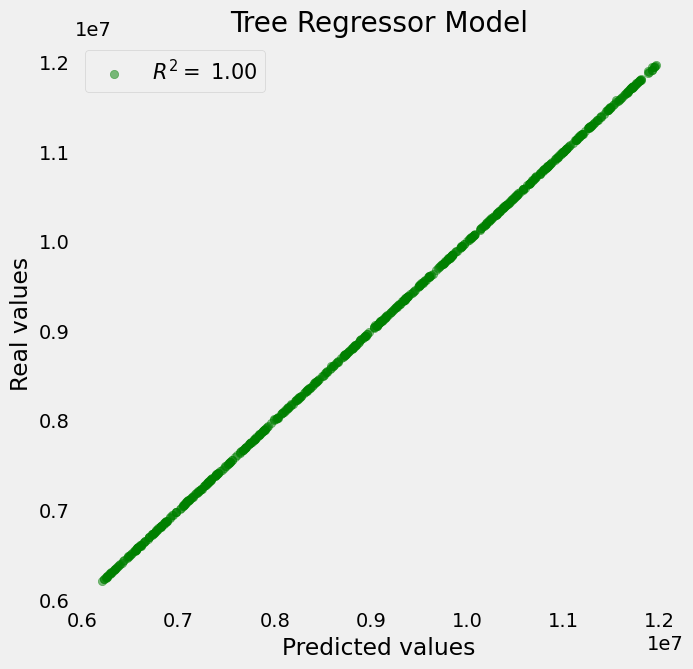

,hour,day,month,year,energy,glob_irrad_in_diffuse,enth,temp,energy_pred,energy_real
time,,,,,,,,,,
2022-06-27 09:00:00,9,27,6,2022,8141202,135.644115,71.364286,29.668182,8143220.0,8141202
2022-04-27 10:00:00,10,27,4,2022,6298778,252.144034,29.533333,11.871429,6295006.0,6298778
2022-07-01 10:00:00,10,1,7,2022,8304091,129.956816,75.360000,31.906667,8306381.0,8304091
2022-05-14 11:00:00,11,14,5,2022,6818914,248.321645,50.322222,22.833333,6816824.0,6818914
2022-08-31 14:00:00,14,31,8,2022,10313727,64.173371,40.600000,18.666667,10316149.0,10313727
...,...,...,...,...,...,...,...,...,...,...
2022-06-15 14:00:00,14,15,6,2022,7794641,148.736601,54.866667,27.014286,7792559.0,7794641
2022-04-28 17:00:00,17,28,4,2022,6341632,50.672565,27.200000,15.600000,6342810.0,6341632
2022-04-27 07:00:00,7,27,4,2022,6293084,78.658212,25.841667,10.016667,6295006.0,6293084


In [22]:

mse = (np.sqrt(mean_squared_error(y_test, DTRPred)))
r2= r2_score(y_test, DTRPred)
mae = mean_absolute_error(y_test, DTRPred)
print("Perfomance for test set {:.2f}".format(r2))
plt.figure()
plt.figure(figsize=(7, 7))
plt.grid()
plt.scatter(y_test,DTRPred,alpha=0.5
        ,color='green',label=r'$R^2 = $ {:.2f}'.format(r2))
plt.title("Tree Regressor Model")
plt.ylabel("Real values")
plt.xlabel("Predicted values")
plt.legend(prop={'size': 15})
plt.show()
X_train.describe().T
test_df = X_test

test_df['energy_pred'] = DTRPred
test_df['energy_real'] = y_test
test_df

In [24]:
test_df['energy_pred'] = DTRPred
test_df['energy_real'] = y_test
test_df[:20]

,hour,day,month,year,energy,glob_irrad_in_diffuse,enth,temp,energy_pred,energy_real
time,,,,,,,,,,
2022-06-27 09:00:00,9,27,6,2022,8141202,135.644115,71.364286,29.668182,8143220.0,8141202
2022-04-27 10:00:00,10,27,4,2022,6298778,252.144034,29.533333,11.871429,6295006.0,6298778
2022-07-01 10:00:00,10,1,7,2022,8304091,129.956816,75.360000,31.906667,8306381.0,8304091
2022-05-14 11:00:00,11,14,5,2022,6818914,248.321645,50.322222,22.833333,6816824.0,6818914
2022-08-31 14:00:00,14,31,8,2022,10313727,64.173371,40.600000,18.666667,10316149.0,10313727
2022-09-04 04:00:00,4,4,9,2022,10399438,7.430171,35.100000,14.950000,10397767.0,10399438
2022-08-10 10:00:00,10,10,8,2022,9716617,164.784468,50.330000,25.733333,9718591.0,9716617
2022-10-22 16:00:00,16,22,10,2022,11914505,16.096455,38.088889,14.971429,11913550.0,11914505
2022-06-19 05:00:00,5,19,6,2022,7887872,63.376919,45.554545,19.845455,7888791.0,7887872
